In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization,Conv2DTranspose,LeakyReLU,Input,Reshape,Activation
from keras.models import Sequential,Model
from keras.datasets import fashion_mnist,mnist
import tensorflow as tf

In [ ]:
#Separación o split de dataset
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
#visualizar los datos
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


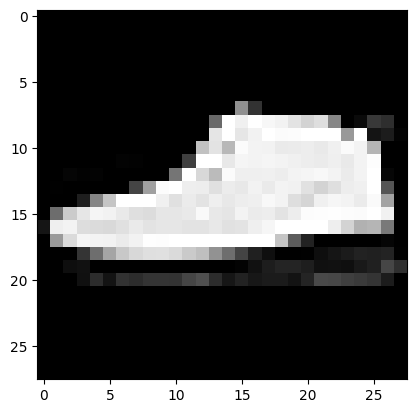

In [ ]:
#visualizacion de datos
i=random.randint(0,59999)
plt.imshow(xtrain[i],cmap='gray')
plt.show()

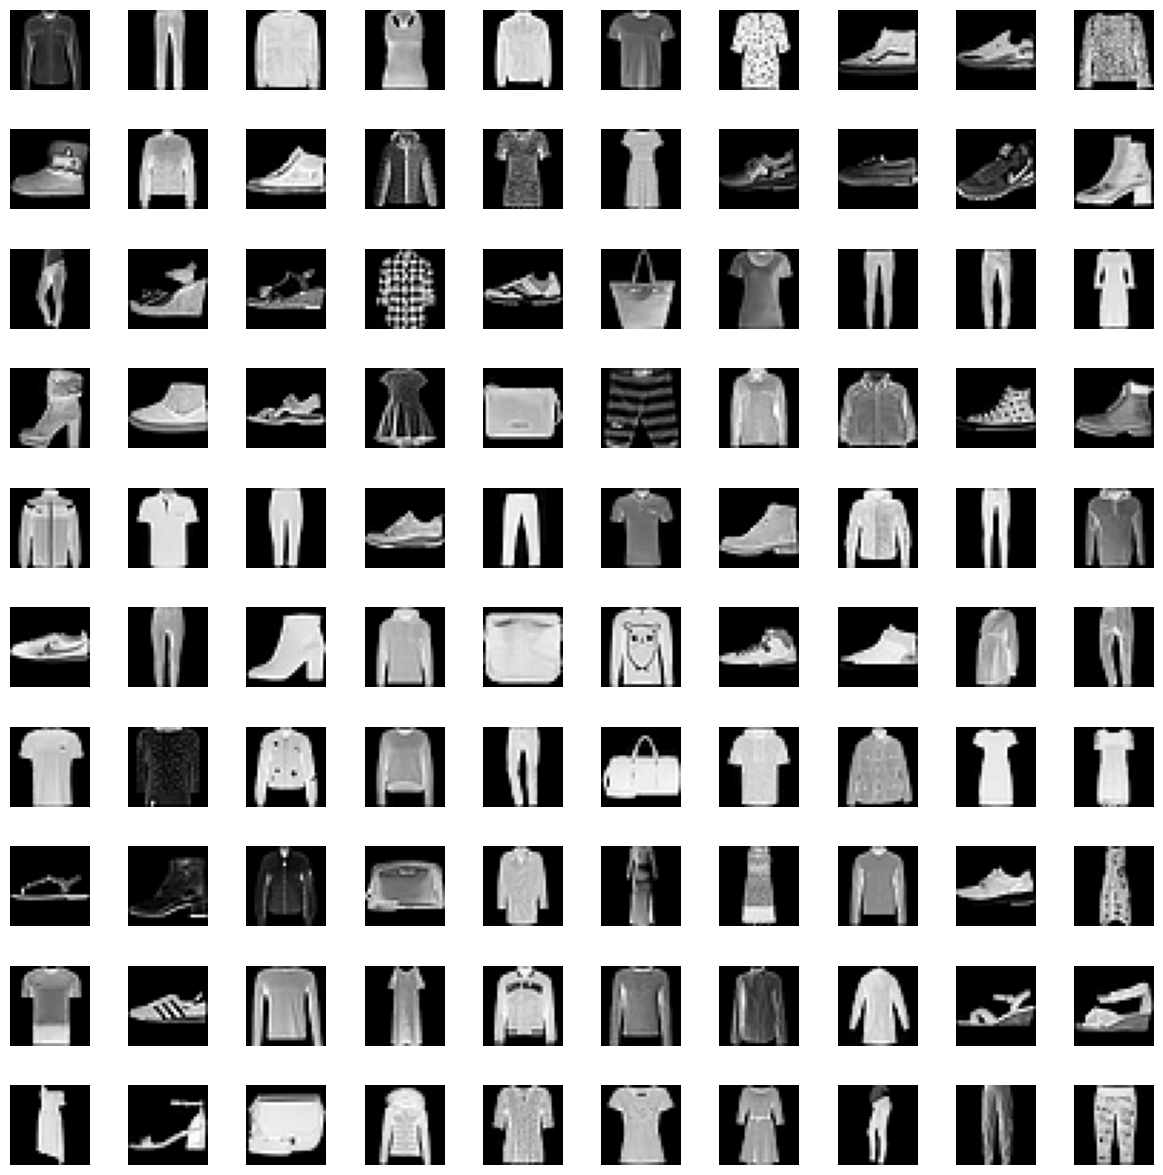

In [ ]:
width=10
height=10
fig,axes=plt.subplots(width,height,figsize=(15,15))
axes=axes.ravel()
for i in range(0,width*height):

  index=np.random.randint(0,59999)
  axes[i].imshow(xtrain[index],cmap='gray')
  axes[i].axis('off')

fig.subplots_adjust(hspace=0.5)

In [ ]:
#preprocesar las imagenes
xtrain[0].min(),xtrain[0].max()

(0, 255)

In [ ]:
#formatear las imagenes
xtrain=xtrain/255
xtest=xtest/255

In [ ]:
xtrain[0].min(),xtrain[0].max()

(0.0, 1.0)

In [ ]:
#xtrain, xtest
xtrain.shape,xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
xtrain.shape[0],xtrain.shape[1],xtrain.shape[2]

(60000, 28, 28)

In [ ]:
xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1]*xtrain.shape[2])
xtrain.shape

(60000, 784)

In [ ]:
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1]*xtest.shape[2])
xtest.shape

(10000, 784)

In [ ]:
#784-128-64-32-64-128-784 red neuronal
#programming the autoencoder

autoencoder=Sequential()

#Encode

autoencoder.add(Dense(128,activation='relu',input_dim=784))
autoencoder.add(Dense(64,activation='relu'))
autoencoder.add(Dense(32,activation='relu'))

#decode

autoencoder.add(Dense(64,activation='relu'))
autoencoder.add(Dense(128,activation='relu'))
autoencoder.add(Dense(784,activation='sigmoid'))



In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [ ]:
autoencoder.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
autoencoder.fit(xtrain,xtrain,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 10s 4ms/step - loss: 0.3191 - accuracy: 0.0124
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2923 - accuracy: 0.0149
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2867 - accuracy: 0.0194
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2835 - accuracy: 0.0218
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2815 - accuracy: 0.0250
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2800 - accuracy: 0.0252
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2789 - accuracy: 0.0268
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2781 - accuracy: 0.0308
Epoch 9/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2774 - accuracy: 0.0306
Epoch 10/100
1875/1875 [==============================] - 7s 4ms/step - 

In [ ]:
#Modelo de encoder
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [ ]:
encoder=Model(inputs=autoencoder.input,outputs=autoencoder.get_layer('dense_2').output)

In [ ]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110816 (432.88 KB)
Trainable params: 110816 (432.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


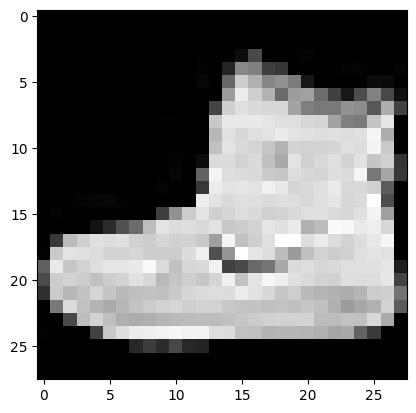

In [ ]:
plt.imshow(xtrain[0].reshape(28,28),cmap='gray')

In [ ]:
xtest[0].shape

(784,)

In [ ]:
xtest[0].reshape(1,-1).shape

(1, 784)

In [ ]:
encoded_image=encoder.predict(xtest[0].reshape(1,-1))

1/1 [==============================] - 0s 98ms/step


In [ ]:
encoded_image,encoded_image.shape

(array([[0.        , 0.31495208, 1.6598545 , 6.683324  , 2.7266598 ,
         3.2019215 , 3.453445  , 1.834775  , 6.554449  , 0.        ,
         3.5918515 , 1.5699297 , 1.2300843 , 1.197773  , 1.2469349 ,
         3.3229396 , 4.71055   , 3.6728065 , 2.328458  , 1.4693642 ,
         0.        , 1.8049217 , 2.4517374 , 2.7411237 , 4.261293  ,
         0.        , 4.673435  , 0.        , 2.2444518 , 2.9307387 ,
         2.8414283 , 0.        ]], dtype=float32),
 (1, 32))

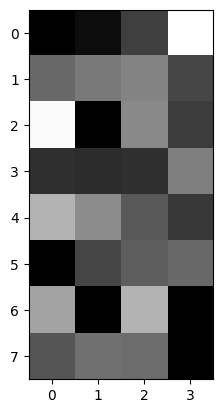

In [ ]:
plt.imshow(encoded_image.reshape(8,4),cmap='gray')

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [ ]:
input_layer_decoder=Input(shape=(32,))
decoder_layer1=autoencoder.layers[3]
decoder_layer2=autoencoder.layers[4]
decoder_layer3=autoencoder.layers[5]
decoder=Model(inputs=input_layer_decoder, outputs=decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111568 (435.81 KB)
Trainable params: 111568 (435.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
decoded_images=decoder.predict(encoded_image)

1/1 [==============================] - 0s 128ms/step


In [ ]:
decoded_images.shape

(1, 784)

In [ ]:
xtest.shape[0]

10000

In [ ]:
n_images=10
test_images=np.random.randint(0,xtest.shape[0]-1,size=n_images)
print(test_images)

[5750 7869 9431 5261 8875  361 7269 6292 1421  741]


0 5750
1/1 [==============================] - 0s 16ms/step
1 7869
1/1 [==============================] - 0s 16ms/step
2 9431
1/1 [==============================] - 0s 16ms/step
3 5261
1/1 [==============================] - 0s 16ms/step
4 8875
1/1 [==============================] - 0s 16ms/step
5 361
1/1 [==============================] - 0s 16ms/step
6 7269
1/1 [==============================] - 0s 17ms/step
7 6292
1/1 [==============================] - 0s 23ms/step
8 1421
1/1 [==============================] - 0s 16ms/step
9 741
1/1 [==============================] - 0s 16ms/step


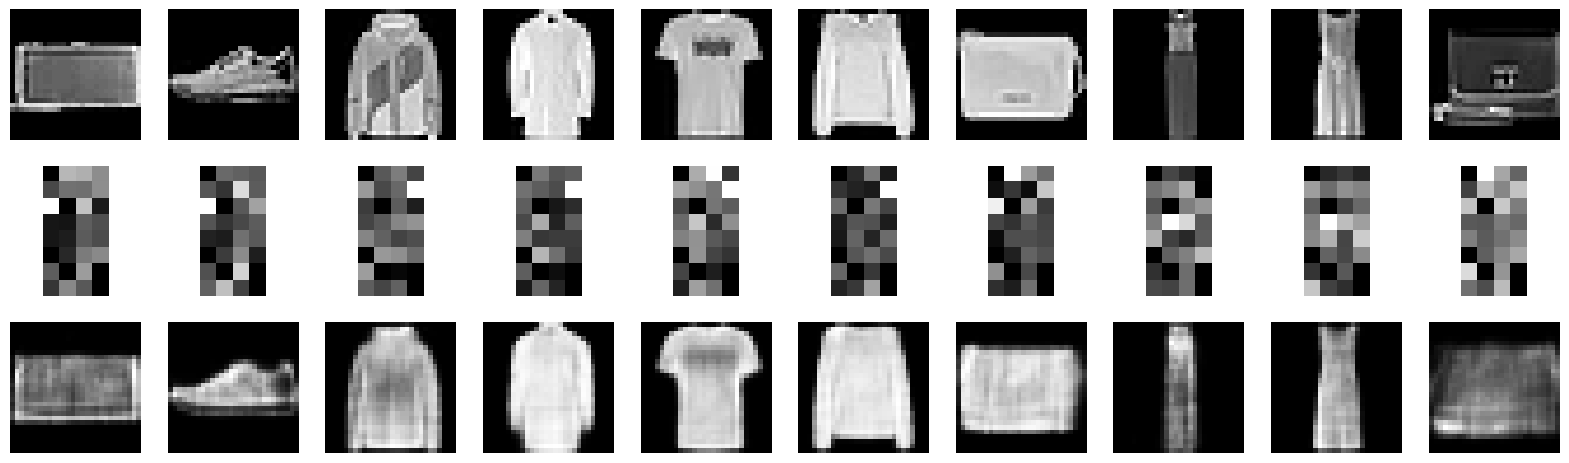

In [ ]:
plt.figure(figsize=(20,20))
for i, image_index in enumerate(test_images):

  #Original image
  print(i, image_index)
  ax=plt.subplot(10,10,i+1)
  plt.imshow(xtest[image_index].reshape(28,28),cmap='gray')
  plt.axis('off')

  #Coded images

  ax=plt.subplot(10,10,i+1+n_images)
  encoded_image=encoder.predict(xtest[image_index].reshape(1,-1))
  plt.imshow(encoded_image.reshape(8,4),cmap='gray')
  plt.axis('off')

  #Decoded Images

  ax=plt.subplot(10,10,i+1+2*n_images)
  plt.imshow(decoder.predict(encoded_image).reshape(28,28),cmap='gray')
  plt.axis('off')
